In [1]:
'''采用自组CNN模型进行猫狗图片二分类'''
import os, shutil
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# 原始数据集的路径
original_dataset_dir = '/home/Howie/alldataset/catsdogsdataset'

# 项目数据集存放路径
base_dir = '/home/Howie/kerasproject/catsdogs_classification/dataset'

# 创建训练集、验证集、测试集目录
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

# 创建猫狗目录
train_cats_dir = os.path.join(train_dir, 'cats')
validation_cats_dir = os.path.join(validation_dir, 'cats')
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(train_cats_dir)
#os.mkdir(validation_cats_dir)
#os.mkdir(test_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(train_dogs_dir)
#os.mkdir(validation_dogs_dir)
#os.mkdir(test_dogs_dir)

#数据集复制
fnames = ['cat.{}.jpg'.format(i) for i in range(5000)]
for fname in fnames:
    scr = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(scr, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(5000, 6000)]
for fname in fnames:
    scr = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(scr, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(6000, 7000)]
for fname in fnames:
    scr = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(scr, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(5000)]
for fname in fnames:
    scr = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(scr, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(5000, 6000)]
for fname in fnames:
    scr = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(scr, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(6000, 7000)]
for fname in fnames:
    scr = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(scr, dst)

In [3]:
# 建立CNN模型
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
 input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [17]:
# 选择优化器
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
 loss='binary_crossentropy', metrics=['acc'])# 选择优化器

In [5]:
# 图像生成器
train_dategen = ImageDataGenerator(rescale=1./255)
validation_dategen = ImageDataGenerator(rescale=1./255)

train_generator = train_dategen.flow_from_directory(train_dir, 
 target_size=(150,150), batch_size=250, class_mode='binary')
validation_generator = validation_dategen.flow_from_directory(validation_dir,
 target_size=(150,150), batch_size=250, class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 10000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
data batch shape: (250, 150, 150, 3)
labels batch shape: (250,)


In [18]:
# 训练模型
history = model.fit_generator(train_generator, steps_per_epoch=20,
 epochs=30, validation_data=validation_generator, validation_steps=4)

 #保存模型
model.save('/home/Howie/kerasproject/catsdogs_classification/cats_and_dogs_small_1.h5')


Epoch 1/30
20/20 [==============================] - 28s 1s/step - loss: 0.0917 - acc: 0.9778 - val_loss: 0.3325 - val_acc: 0.8700
Epoch 2/30
20/20 [==============================] - 28s 1s/step - loss: 0.0823 - acc: 0.9818 - val_loss: 0.3171 - val_acc: 0.8740
Epoch 3/30
20/20 [==============================] - 28s 1s/step - loss: 0.0817 - acc: 0.9814 - val_loss: 0.3310 - val_acc: 0.8550
Epoch 4/30
20/20 [==============================] - 28s 1s/step - loss: 0.0808 - acc: 0.9818 - val_loss: 0.3258 - val_acc: 0.8750
Epoch 5/30
20/20 [==============================] - 28s 1s/step - loss: 0.0783 - acc: 0.9834 - val_loss: 0.3314 - val_acc: 0.8730
Epoch 6/30
20/20 [==============================] - 28s 1s/step - loss: 0.0751 - acc: 0.9832 - val_loss: 0.2901 - val_acc: 0.8850
Epoch 7/30
20/20 [==============================] - 28s 1s/step - loss: 0.0768 - acc: 0.9838 - val_loss: 0.3269 - val_acc: 0.8730
Epoch 8/30
20/20 [==============================] - 28s 1s/step - loss: 0.0746 - acc: 0.98

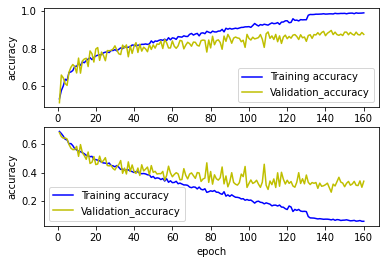

In [19]:
# 训练过程可视化
acc = acc + history.history['acc'] 
val_acc = val_acc + history.history['val_acc'] 
loss = loss + history.history['loss']
val_loss = val_loss + history.history['val_loss'] 

epoch = range(1, len(acc)+1)

plt.subplot(211)
plt.plot(epoch, acc, 'b', label='Training accuracy')
plt.plot(epoch, val_acc, 'y', label='Validation_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(212)
plt.plot(epoch, loss, 'b', label='Training accuracy')
plt.plot(epoch, val_loss, 'y', label='Validation_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [20]:

plt.savefig("/home/Howie/kerasproject/catsdogs_classification/epoch130_small_1.png")

<Figure size 432x288 with 0 Axes>